In [339]:
x_data_s2 = np.loadtxt('S2.txt',usecols=(1))
y_data_s2 = np.loadtxt('S2.txt',usecols=(2))
x_data_err_s2 = np.loadtxt('S2.txt',usecols=(3))
y_data_err_s2 = np.loadtxt('S2.txt',usecols=(4))


In [325]:
import numpy as np
import matplotlib.pyplot as plt 

In [326]:
#Setting orbital parameter values
e_s2 = 0.872
a_s2 = 0.121
dist = 1.689*10**9 #AU
arc2rad = 4.85*10**(-6)

# Set up orbit
rad = np.arange(0, (2 * np.pi), 0.01)
r_s2 = a_s2*(1-e_s2**2)/(1+e_s2*np.cos(rad))
x_s2 = r_s2*np.cos(rad)
y_s2 = r_s2*np.sin(rad)

In [327]:
#In sky plane
rad_sky_s2 = Omega_s2 + np.arctan(np.tan(rad+omega_s2)*np.cos(i_s2))
rho_s2 = r_s2*np.cos(rad+omega_s2)/(np.cos(rad_sky_s2-Omega_s2))

#Writing in terms of x,y
x_sky_s2 = rho_s2*np.cos(rad_sky_s2)
y_sky_s2 = rho_s2*np.sin(rad_sky_s2)


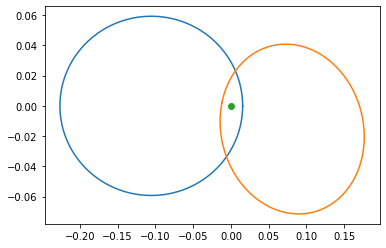

In [328]:
plt.plot(x_s2, y_s2)
plt.plot(x_sky_s2, y_sky_s2)
plt.plot([0],[0],'o')

In [300]:
# Set up inverted system
def calc(DEC_, RA_):
    rad_sky_ = np.arctan2(DEC_,RA_)
    rad = np.arctan2(np.tan(rad_sky_-Omega_s2),np.cos(i_s2))-omega_s2
    r_true = np.sqrt(DEC_**2 + RA_**2)*np.cos(rad_sky_-Omega_s2)/np.cos(rad+omega_s2)
    x_s2 = r_true*np.cos(rad)*dist*arc2rad
    y_s2 = r_true*np.sin(rad)*dist*arc2rad
    
    au_x = x_s2
    au_y = y_s2 
    return x_s2, y_s2

27


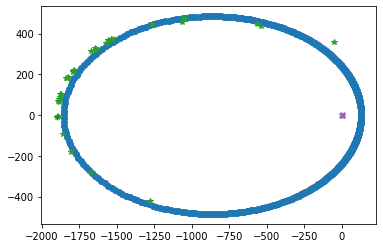

In [301]:
x_, y_ = calc(y_sky_s2,x_sky_s2)
x_dat, y_dat = calc(x_data_s2,y_data_s2)
plt.plot(x_, y_,'o')
plt.plot(x_s2, y_s2,'-')
plt.plot(x_dat, y_dat, '*')
plt.plot(x_dat[27], y_dat[27], '+')
plt.plot([0], [0], 'X')
print(np.argmax(np.sqrt(x_dat**2 + y_dat**2)))

In [329]:
G = 4*np.pi**2
M = 4.15*10**6
mu = G*M
v_per = np.sqrt((1-e_s2)*mu/((1+e_s2)*a_s2*arc2rad*dist))

In [330]:
v_per

106.31085234037761

In [331]:
s2_ra = np.array([0.0386, 0.0385, 0.0393,
0.0330,0.0333,0.0315,0.0265,
0.0141,0.0137,0.0129,0.0107,
0.0064,0.0058,0.0069,0.0047,
-0.0076,-0.0082,-0.0084,-0.0118,
-0.0126,-0.0127,-0.0216,-0.0218,
-0.0233,-0.0266,-0.0249,-0.0260,
-0.0347,-0.0340,-0.0430,-0.0518,
-0.0603,-0.0690,])

s2_dec = np.array([0.0213,
0.0701,0.0733,0.1191,0.1206,
0.1206,0.1389,0.1596,0.1609,
0.1627,0.1633,0.1681,0.1682,
0.1691,0.1709,0.1775,0.1780,
0.1777,0.1798,0.1802,0.1806,
0.1805,0.1813,0.1803,0.1800,
0.1806,0.1804,0.1780,0.1774,
0.1703,0.1617,0.1442,0.1010,])
time = np.array([2002.578,
2003.447,2003.455,2004.511,2004.516,2004.574,2005.268,
2006.490,2006.584,2006.726,2006.800,
2007.205,2007.214,2007.255,2007.455,
2008.145,2008.197,2008.268,2008.456,
2008.598,2008.708,2009.299,2009.334,
2009.501,2009.605,2009.611,2009.715,
2010.444,2010.455,2011.400,2012.374,
2013.488,2015.581,])

In [332]:
RA = s2_ra[27]
DEC = s2_dec[27]
t1 = time[27]
RA2 = s2_ra[28]
DEC2 = s2_dec[28]
t2 = time[28]

delta_t = t2-t1
delta_t

au_x1, au_y1 = calc(RA, DEC)
au_x2, au_y2 = calc(RA2, DEC2)

print(t1, t2)

vx = (au_x1-au_x2)/delta_t
vy = (au_y1-au_y2)/delta_t


2010.444 2010.455


In [333]:
tot = np.sqrt((au_x2-au_x1)**2+ (au_y2-au_y1)**2)

In [334]:
au_x1

-1901.4645023620326

In [335]:
au_y1

-9.109959942678186

In [336]:
(au_x2-au_x1)/tot

0.8698524492141125

In [337]:
(au_y2-au_y1)/tot

0.49331198707938323

In [338]:
np.sqrt(0.87**2+0.49**2)

0.9984988733093293